In [3]:
import pandas as pd
import urllib.request
import os
import asyncio
from functools import reduce
from PIL import Image

separate_files = [pd.read_csv('./bigCatsCsv/training.csv',header=[0],index_col=0),
                pd.read_csv('./bigCatsCsv/validation.csv',header=[0],index_col=0),
                pd.read_csv('./bigCatsCsv/testing.csv',header=[0],index_col=0)]
files = reduce(lambda a,b : a.append(b),separate_files)
files = files.reset_index(drop=True)

if not os.path.isdir('bigCatsEdited'):
    os.mkdir('bigCatsEdited', 0o755)

def urlToFilename(url):
    return url[url.rfind('/')+1:]

for r in files.iloc:
    originalPath = "./bigCats/"+urlToFilename(r.OriginalURL)
    editedPath = "./bigCatsEdited/"+str(r.name)+"_"+urlToFilename(r.OriginalURL)
    if os.path.isfile(originalPath) and not os.path.isfile(editedPath):
        img = Image.open(originalPath)
        width,height = img.size
        cropCoords = (int(width*r.XMin),int(height*r.YMin),int(width*r.XMax),int(height*r.YMax))
        cropped_img = img.crop(cropCoords)
        cropped_img.save(editedPath)

OriginalURL    https://c8.staticflickr.com/1/21/25029452_6929...
XMin                                                    0.096284
XMax                                                    0.559122
YMin                                                      0.6125
YMax                                                      0.8075
Class                                                    Leopard
Name: 14, dtype: object
592 400
(57, 245, 331, 323)


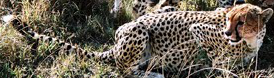

In [6]:
#Looking at a specific image.

r = files.iloc[14]
print(r)
originalPath = "./bigCats/"+urlToFilename(r.OriginalURL)
editedPath = "./bigCatsEdited/"+urlToFilename(r.OriginalURL)
img = Image.open(originalPath)
width,height = img.size
cropCoords = (int(width*r.XMin),int(height*r.YMin),int(width*r.XMax),int(height*r.YMax))
print(width,height)
print(cropCoords)
croped_img = img.crop(cropCoords)
display(croped_img)
croped_img.save(editedPath)